In [12]:
# Taxi Birth Death Model 

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

def get_expected(X):
    expected = sum(X) / len(X)
    return expected

def get_variance(X):
    m = get_expected(X)
    variance = sum((xi - m) ** 2 for xi in X) / len(X)
    return variance

def print_results(X_T1, X_T2, realizations):
    for realization in range(realizations):
        print("================================================================")
        print("Realization: %d" % int(realization+1))
        print("================================================================")

        expected = get_expected(X_T1[realization])
        variance = get_variance(X_T1[realization])
        covariance = get_covariance(X_T1[realization], X_T2[realization])
        print("λ: %f\nExpected: %f\nVariance: %f\nCovariance:" %(lambda_, expected, variance))
        print(covariance)
        print("\n")


def taxi_birth_death(birth_rate, death_rate, init_pop, max_pop, realizations):  
    arrival_times = np.zeros((realizations, max_pop))
    population = np.zeros((realizations, max_pop))
    
    arrival_times[:,0] = 0.001
    population[:,0] = init_pop
    
    for realization in range(realizations):
        i = 0
        while i < (max_pop-1):
            u1 = np.random.rand()
            u2 = np.random.rand()
            if (population[realization, i] == 0):
                interarrival_time = -np.log(u1)/((birth_rate+death_rate))
            else:
                interarrival_time = -np.log(u1)/((birth_rate+death_rate)*population[realization,i])


            arrival_times[realization,i+1] = arrival_times[realization,i] + interarrival_time

            if u2 < birth_rate/(birth_rate+death_rate):
                population[realization,i+1] = population[realization,i] + 1 # birth occurs
            else:
                if (population[realization, i] >= 1):
                    population[realization,i+1] = population[realization,i] - 1 # death occurs
                else:
                    population[realization,i+1] = population[realization,i] # death occurs

                
            i += 1
    
    return [arrival_times, population]
    

def show_taxi_bd_graph(birth_rate, death_rate, init_pop, max_pop, realizations):
    fig, ax = plt.subplots()
    
    [arrival_times, population] = taxi_birth_death(birth_rate, death_rate, init_pop, max_pop, realizations)

    
    xmax = min([max(arrival_times[realization,:]) for realization in range(realizations)])
    #ymin = min([min(population[k,:]) for k in range(paths)])
    ymax = max([max(population[realization,:]) for realization in range(realizations)])
    
    arrival_times[arrival_times==0] = np.nan
    
    ## Generates plots
    for realization in range(realizations):
        print("================================================================")
        print("Realization: %d" % int(realization+1))
        print("================================================================")

        expected = get_expected(population[realization,:])
        variance = get_variance(population[realization,:])
        print("Lambda: %d\nMu: %d\nExpected: %f\n" %(birth_rate, death_rate, expected))
        print("\n")
        plt.step(arrival_times[realization,:], population[realization,:], where='pre', label="Path %s" % str(realization+1))
        
    plt.axis([0, np.minimum(xmax+0.2, max_pop), 0, np.minimum(ymax+2, 100)])
    ax.set_title('Taxi Birth and Death Process', fontsize=20)
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel('Taxis', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.legend(loc=1)
    plt.grid(True)
    plt.show()




Realization: 1
Lambda: 1
Mu: 2
Expected: 1.100000



Realization: 2
Lambda: 1
Mu: 2
Expected: 1.192000



Realization: 3
Lambda: 1
Mu: 2
Expected: 1.328000



Realization: 4
Lambda: 1
Mu: 2
Expected: 1.166000



Realization: 5
Lambda: 1
Mu: 2
Expected: 0.884000





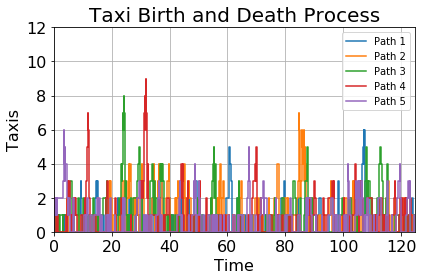

In [13]:
init_pop = 0
max_pop = 500
realizations = 5
birth_rate = 1.0 # taxis arrive
death_rate = 2.0 # people arrive 
    
show_taxi_bd_graph(birth_rate, death_rate, init_pop, max_pop, realizations)

In [6]:
pij = np.array([[.8, .2], [.6, .4]])
def rij(pij, n):
    if n == 1:
        return pij
    else:
        return np.dot(rij(pij, n-1), pij)

rij(pij, 5)

array([[0.75008, 0.24992],
       [0.74976, 0.25024]])

[[0.5044955  0.41758242 0.07792208]]
[[0.21188119 0.71485149 0.07326733]
 [0.90191388 0.         0.09808612]
 [0.25974026 0.74025974 0.        ]]


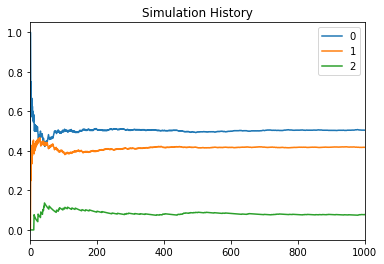

In [7]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])
stateChangeHist= np.array([[0.0,  0.0,  0.0],
                          [0.0, 0.0,  0.0],
                          [0.0, 0.0,  0.0]])
state=np.array([[1.0, 0.0, 0.0]])
currentState=0
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]
seed(4)
# Simulate from multinomial distribution
def simulate_multinomial(vmultinomial):
    r=np.random.uniform(0.0, 1.0)
    CS=np.cumsum(vmultinomial)
    CS=np.insert(CS,0,0)
    m=(np.where(CS<r))[0]
    nextState=m[len(m)-1]
    return nextState

for x in range(1000):
    currentRow=np.ma.masked_values((P[currentState]), 0.0)
    nextState=simulate_multinomial(currentRow)
    # Keep track of state changes
    stateChangeHist[currentState,nextState]+=1
    # Keep track of the state vector itself
    state=np.array([[0,0,0]])
    state[0,nextState]=1.0
    # Keep track of state history
    stateHist=np.append(stateHist,state,axis=0)
    currentState=nextState
    # calculate the actual distribution over the 3 states so far
    totals=np.sum(stateHist,axis=0)
    gt=np.sum(totals)
    distrib=totals/gt
    distrib=np.reshape(distrib,(1,3))
    distr_hist=np.append(distr_hist,distrib,axis=0)
                       
print(distrib)
P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]
# Check estimated state transition probabilities based on history so far:
print(P_hat)
dfDistrHist = pd.DataFrame(distr_hist)
# Plot the distribution as the simulation progresses over time
dfDistrHist.plot(title="Simulation History")
#plt.show()